# PROBLEM STATEMENT
## The MNIST dataset contains 60,000 small 28*28 pixel grayscale images of handwritten single digits. The digits are between 0 and 9.
## We need to classify a given image of hand-written given digits into one of 10 classes.

In [2]:
# Load the data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
import keras
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

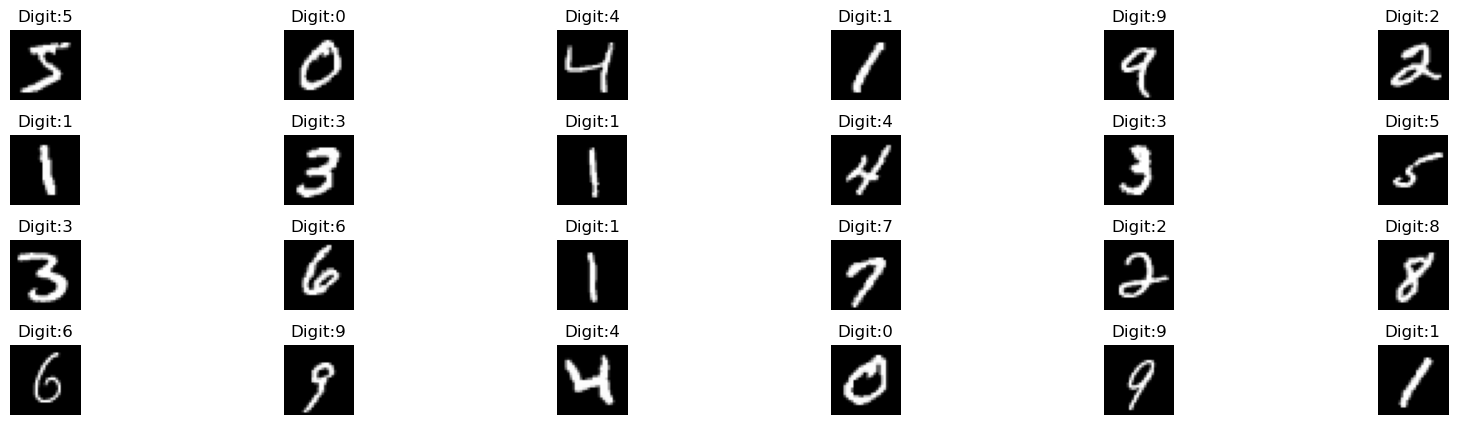

In [10]:
fig=plt.figure(figsize=(20,5))
for i in range(24):
    ax=fig.add_subplot(4,6,i+1,xticks=[],yticks=[])
    plt.title("Digit:{}".format(y_train[i]))
    plt.subplots_adjust(hspace=0.5,wspace=0.5,)
    plt.axis('off')
    ax.imshow(x_train[i],cmap='gray')       

In [11]:
x_train[0].shape

(28, 28)

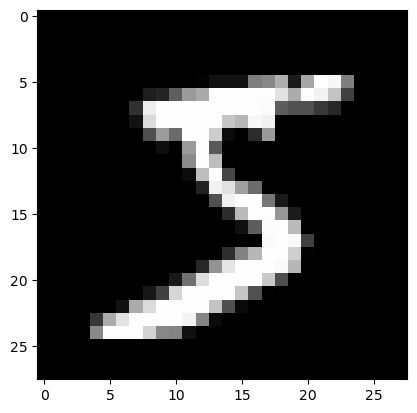

5


In [13]:
plt.imshow(x_train[0],cmap='gray')
plt.show()
print(y_train[0])

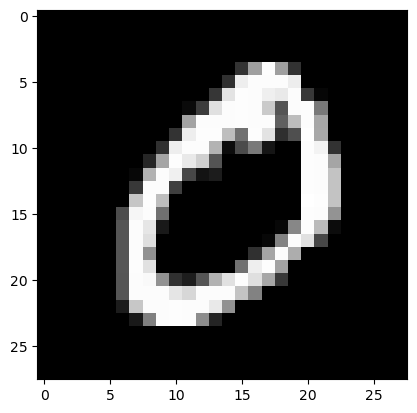

0


In [14]:
plt.imshow(x_train[1],cmap='gray')
plt.show()
print(y_train[1])

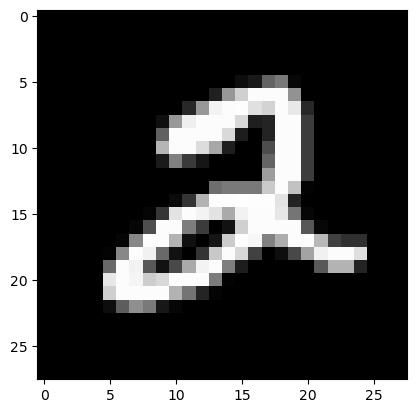

2


In [15]:
plt.imshow(x_train[5],cmap='gray')
plt.show()
print(y_train[5])


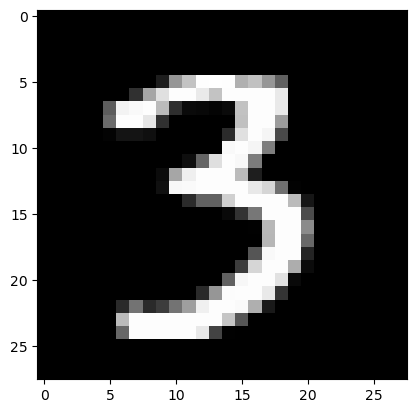

3


In [16]:
plt.imshow(x_train[10000],cmap='gray')
plt.show()
print(y_train[10000])

In [17]:
# Rescale the image by dividing every pixel in Every Image by 255.
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [18]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [19]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
# Applying One hot encoding to convert categorial to numerical value
from tensorflow import keras
from tensorflow.keras import layers
num_classes=10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [21]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [22]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
#Creating the Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense, Dropout

In [24]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10,activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)         

In [25]:
# Compile the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
#Train the model
model.fit(x_train,y_train,verbose=1,epochs=10)

Epoch 1/10


1875/1875 [==============================] - 22s 11ms/step - loss: 0.2317 - accuracy: 0.9242
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0856 - accuracy: 0.9733
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0672 - accuracy: 0.9785
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0580 - accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0493 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0458 - accuracy: 0.9859
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0405 - accuracy: 0.9869
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0370 - accuracy: 0.9879
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0360 - accuracy: 0.9883
Epoch 10/10
1875/1875 [==============================] - 18s 9ms

In [38]:
# Evaluate the trained Model
loss_accuracy=model.evaluate(x_test,y_test,verbose=0)
print('Test Accuracy:',loss_accuracy[1])
print('Test_loss:',loss_accuracy[0])

Test Accuracy: 0.991100013256073
Test_loss: 0.029254836961627007


In [39]:
# Evaluate the test accuracy
score=model.evaluate(x_test,y_test,verbose=0)
accuracy=100*score[1]
print('Accuracy:',accuracy)

Accuracy: 99.1100013256073


In [40]:
y_predict=model.predict(x_test)
y_predict[1]

313/313 [==============================] - 1s 3ms/step


array([2.9849664e-10, 8.1633992e-08, 9.9999988e-01, 5.1950658e-14,
       9.2200336e-14, 4.1274278e-18, 3.0707973e-14, 7.9616782e-12,
       6.0732344e-13, 2.6949990e-15], dtype=float32)

In [41]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[0]

7

# Save the Model


In [42]:
model.save('HDR.r10')

INFO:tensorflow:Assets written to: HDR.r10\assets


INFO:tensorflow:Assets written to: HDR.r10\assets


In [43]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [44]:
X_train=x_train.reshape(60000,-1)
X_test=x_test.reshape(10000,-1)

In [45]:
X_train.shape


(60000, 784)

In [46]:
X_test.shape

(10000, 784)

In [47]:
predictions=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [48]:
print(predictions)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [49]:
## To understand, convert the predictions from one hot encoding, we need to use numpy for that
print(np.argmax(predictions[0])) #argmax will return the maximum value index and find the value of it.

7


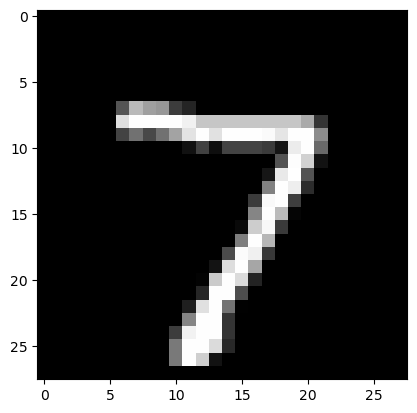

In [50]:
# now to check that our answer is True or False
plt.imshow(x_test[0],cmap='gray')

In [51]:
print(np.argmax(predictions[128]))

8


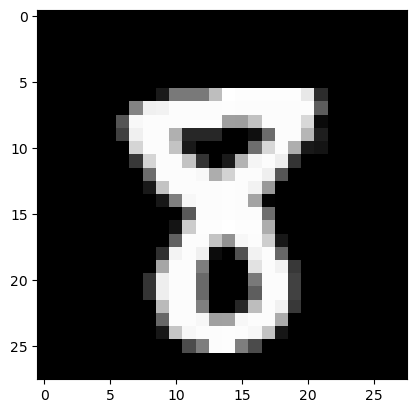

In [52]:
# now to check that our answer is True or False
plt.imshow(x_test[128],cmap='gray')

In [42]:
print(np.argmax(predictions[500]))


3


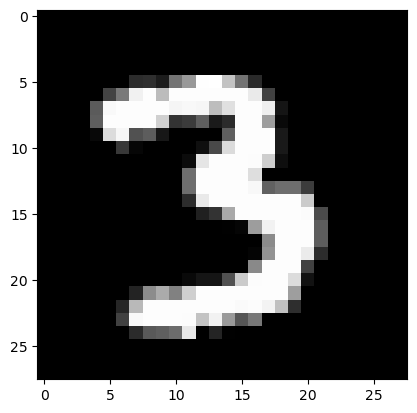

In [53]:
plt.imshow(x_test[500],cmap='gray')

In [54]:
!pip install opencv-python

In [55]:
import cv2


In [56]:
image=cv2.imread('seven.png') # Image created by ourself in paint to check it.

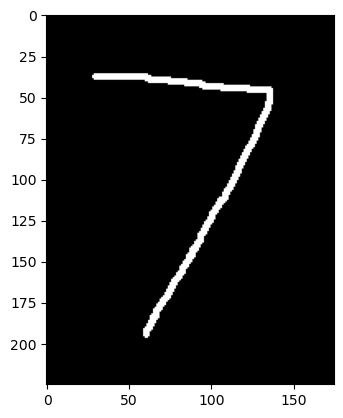

In [57]:
plt.imshow(image)  # this will load our created image.

In [58]:
image.shape # this is the shape of created image.

(225, 175, 3)

In [59]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [60]:
gray.shape # overlapping of color image/ channel 3 is gone


(225, 175)

In [61]:
resized=cv2.resize(gray,(28,28)) # This will resize our image to 28 * 28 pixels

In [62]:
resized.shape

(28, 28)

In [63]:
new_image=keras.utils.normalize(resized,axis=1)

In [64]:
new_image=np.array(new_image).reshape(-1,28,28,1) # Kernel operation of convolution layer

In [65]:
new_image.shape # Now converted into our desired image pixel

(1, 28, 28, 1)

In [66]:
predictions=model.predict(new_image)

1/1 [==============================] - 0s 88ms/step


In [67]:
print(np.argmax(predictions))

7


# Compare with SVM

In [68]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
svm_predict=model_svm.predict(X_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=svm_predict))

accuracy score :
 0.9792


In [69]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_true=y_test,y_pred=svm_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Compare with KNN

In [78]:
# import KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
# create empty list to store error values
error_rate=[]

for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))
error_rate

[0.0309, 0.0373, 0.0295, 0.0318, 0.0312, 0.0323, 0.0306, 0.033, 0.0341, 0.0335]

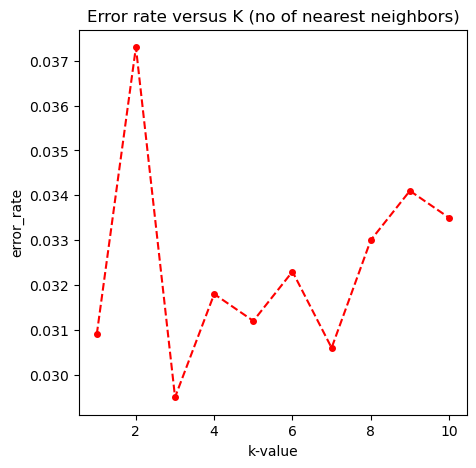

In [80]:
plt.figure(figsize=(5,5))
plt.plot(range(1,11),error_rate,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

# From the above grahp K= 7, clearly it shows that 7 gives the less error.

In [83]:
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)

# Evaluate the Model

In [84]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report ,f1_score

In [85]:
# accuracy score
accuracy_score(y_test,y_pred)

0.9694

In [86]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

